![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vista en clases.</font>


# 1) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías del ejemplo visto en clase.*



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 2) Rectas y líneas




*   Encuentre la ecuación de la recta que pasa por los puntos (3,5) y (7,8)
*   Encuentre la intersección de la recta $y=2x+3$ con la recta $y=-x$



In [ ]:
# RECTA

m1 = [3,5,1]
m2 = [7,8,1]
(a,b,c)   = np.cross(m1,m2)
print('RECTA: '+str(a)+'x+ '+str(b)+'y+ '+str(c)+' = 0')


ell1 = [2,-1,3]
ell2 = [-1,-1,0]
w   = np.cross(ell1,ell2)
(x,y) = w[0:2]/w[2]
print('INTERSECCION: x = '+str(x)+'   y = '+str(y))




RECTA: -3x+ 4y+ -11 = 0
INTERSECCION: x = -1.0   y = 1.0


# 3) Cargue la Imagen de John Lennon y Despliéguela

(1 Punto)

*Lea erchivo de la imagen se encuentra en este link:*

`https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg`



--2023-08-10 20:26:19--  https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/g4hee0epvla4n5j/JohnLennon.jpg [following]
--2023-08-10 20:26:19--  https://www.dropbox.com/s/raw/g4hee0epvla4n5j/JohnLennon.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f63792cdc999b7e1a04c58150.dl.dropboxusercontent.com/cd/0/inline/CBgAEVP48EaNlahz2RzrqCBkEqqJYTIZcRFWisG60QLO0Oqcsal1mXi0tFF52KtIZF9u95SSHmDC-wbji4x44YAe91tTvG4GOHcXobzVQOeSWZFHPtuJCAGf9EHrMHvzo7Y/file# [following]
--2023-08-10 20:26:20--  https://uc0f63792cdc999b7e1a04c58150.dl.dropboxusercontent.com/cd/0/inline/CBgAEVP48EaNlahz2RzrqCBkEqqJYTIZcRFWisG60QLO0Oqcsal1mXi0tFF52KtIZF9u95SSHmDC-wbji4x44YAe91tTvG4GOHcXobzVQOeSWZFHPtuJC

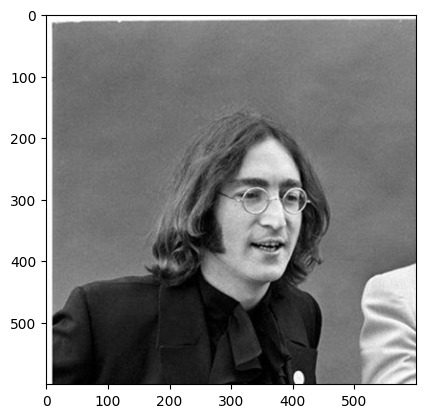

In [ ]:
!wget https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg
I = cv2.imread('JohnLennon.jpg')
plt.imshow(I)
plt.show()

# 4) Cargue las coordenadas (x,y) de los 68 Landmarks

(1 Punto)

*Los archivos de la coordenadas son:*

`https://www.dropbox.com/s/6xfjsz0ymbctbhr/JL_landmarks_x.npy`

`https://www.dropbox.com/s/18chd3jdw95vmt7/JL_landmarks_y.npy`

*Cargue en `x` el primero archivo, y en `y` el segundo archivo*

Help: [Cómo cargar archivos npy ?](https://www.google.com/search?q=como+cargar+archivos+npy)

In [ ]:
!wget https://www.dropbox.com/s/6xfjsz0ymbctbhr/JL_landmarks_x.npy
!wget https://www.dropbox.com/s/18chd3jdw95vmt7/JL_landmarks_y.npy
x = np.load('JL_landmarks_x.npy')
y = np.load('JL_landmarks_y.npy')

--2023-08-10 20:26:20--  https://www.dropbox.com/s/6xfjsz0ymbctbhr/JL_landmarks_x.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/6xfjsz0ymbctbhr/JL_landmarks_x.npy [following]
--2023-08-10 20:26:21--  https://www.dropbox.com/s/raw/6xfjsz0ymbctbhr/JL_landmarks_x.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc72b70e0a42f39d21c582e8b155.dl.dropboxusercontent.com/cd/0/inline/CBhB956LSKu6gpoSnFKYK0AMqzRYpRGrsoX245hZ20663aBgb765EUh9Q1D-13IEk47vwBilrtmwIwRBoqCtWUouqvsCQETjgELlnATFih8xd6pBCW_VbUnAeWYOAz0lYnk/file# [following]
--2023-08-10 20:26:21--  https://uc72b70e0a42f39d21c582e8b155.dl.dropboxusercontent.com/cd/0/inline/CBhB956LSKu6gpoSnFKYK0AMqzRYpRGrsoX245hZ20663aBgb765EUh9Q1D-13IEk47vwBilrtmwIwRBoqCtWUouqvsCQETjgELlnATFi

# 5) Despliegue los 68 landmarks en la cara de John Lennon
(2 Puntos)

*Debe mostrar los 68 puntos sobre la imagen de John Lennon*

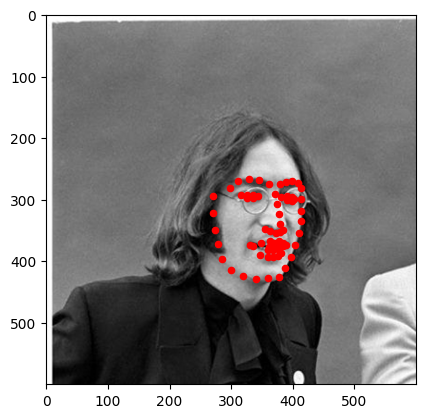

In [ ]:
plt.imshow(I)
plt.scatter(x, y, s=20,c='red')
plt.show()

# Usando el esquema de la siguiente figura encuentre hacia dónde mira John Lennon en la imagen cargada

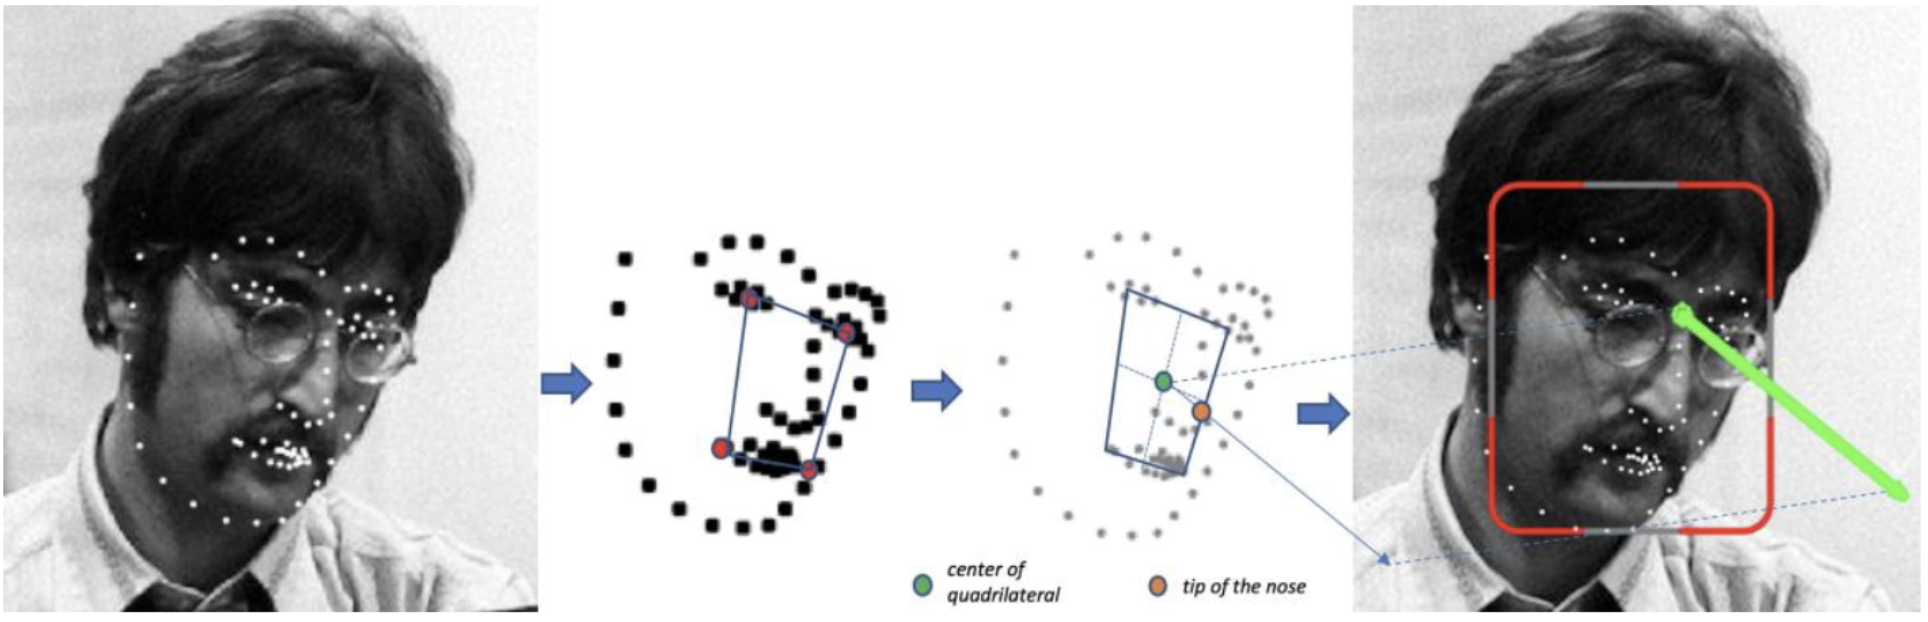

# 6) Encuentre el cuadrilatero definido por los ojos y comisura de los labios

(2 Puntos)

*Siguiendo el esquema de la figura muestre el cuadrilatero de los cuatro puntos rojos, debe mostrar los cuatro puntos y la línea del cuadrilátero, sobre la imagen de John Lennon*

[Cómo están definidos los 68 landmarks?](https://github.com/domingomery/vision/blob/master/clases/Cap02_Geometria/practice/facial_landmarks_68markup.jpg)

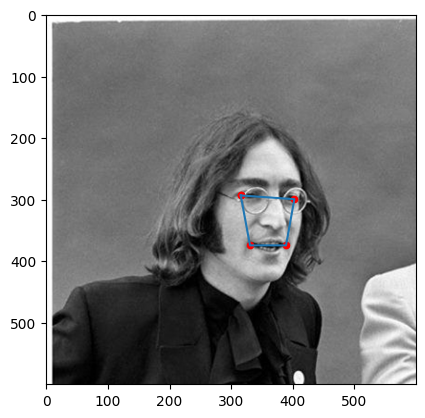

In [ ]:
plt.imshow(I)

x_eye_left    = x[0,36]
y_eye_left    = y[0,36]
x_eye_right   = x[0,45]
y_eye_right   = y[0,45]



x_mouth_left  = x[0,48]
y_mouth_left  = y[0,48]
x_mouth_right = x[0,54]
y_mouth_right = y[0,54]


xp = [x_eye_left,x_eye_right,x_mouth_right,x_mouth_left,x_eye_left]
yp = [y_eye_left,y_eye_right,y_mouth_right,y_mouth_left,y_eye_left]

plt.scatter(xp, yp, s=20,c='red')
plt.plot(xp,yp)
plt.show()

# 7) Defina las coordenadas homogéneas de los cuatro puntos del cuadrilatero

(1 Punto)

Defina los siguientes 4 puntos en ccordenadas homogéneas e imprimalos con `print`.

* Punto m1 : ojo izquierdo

* Punto m2 : ojo derecho

* Punto m3 : comisura izquierda del labio

* Punto m4 : comisura derecha del labio



In [ ]:
m1 = [xp[0],yp[0],1]
m2 = [xp[1],yp[1],1]
m3 = [xp[3],yp[3],1]
m4 = [xp[2],yp[2],1]

print('m1 = ',m1)
print('m2 = ',m2)
print('m3 = ',m3)
print('m4 = ',m4)

m1 =  [315.5, 293.0, 1]
m2 =  [402.5, 299.0, 1]
m3 =  [330.5, 374.0, 1]
m4 =  [389.0, 374.0, 1]


# 8) Encuentre mc, el centro del cuadrilátero y despliéguelo

(2 Puntos)

*Usando la metodología vista en clases -con coordenadas homogénas-, encuentre el centro del cuadrilatero como la intersección de la recta que pasa por (m1 y m4) con la recta que pasa por (m2 y m3).*

*Debe mostrar los cuatro puntos del cuadrilátero, la línea del cuadrilátero, y el centro del cuadrilátero sobre la imagen de John Lennon.*


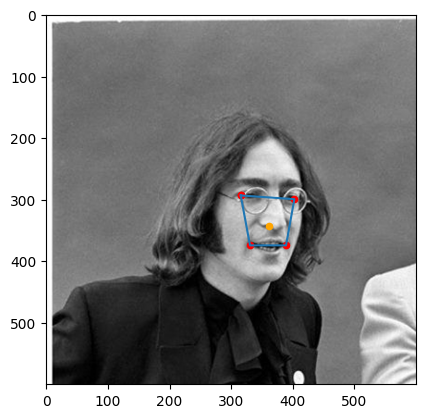

In [ ]:
ell_1 = np.cross(m1,m4)
ell_2 = np.cross(m2,m3)
mc    = np.cross(ell_1,ell_2)
xc    = mc[0]/mc[2]
yc    = mc[1]/mc[2]

plt.imshow(I)

plt.scatter(xp, yp, s=20,c='red')
plt.plot(xp,yp)
plt.scatter(xc, yc, s=20,c='orange')

plt.show()


# 9) Hacia dónde mira John Lennon? (Parte 1)

(2 Punto)

*Encuentre la ecuación de la recta que pasa por mc y la punta de la nariz y grafique esa línea desde mc hasta mq, donde mq es el punto de la línea en x=500.*

*Debe mostrar los cuatro puntos del cuadrilátero, la línea del cuadrilátero, el centro del cuadrilátero, y la línea encontrada, sobre la imagen de John Lennon.*


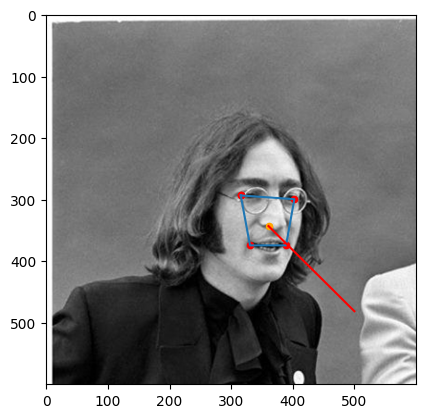

In [ ]:
mn = [x[0,33],y[0,33],1] # punta de la nariz
ell_n = np.cross(mc,mn)
a   = ell_n[0]
b   = ell_n[1]
c   = ell_n[2]

plt.imshow(I)
plt.scatter(xp, yp, s=20,c='red')
plt.plot(xp, yp)
plt.scatter(xc, yc, s=20,c='orange')
xr = 500
yr = -(a*xr+c)/b
plt.plot([xc,xr],[yc,yr],color='red')

plt.show()

# 10) Hacia dónde mira John Lennon? (Parte 2)

(2 Punto)

*Desplace la línea encontrada en el paso anterior de tal forma que comience (no desde mc) sino desde mt, definido como el punto medio entre m1 y m2.*

*Debe mostrar la nueva línea encontrada sobre la imagen de John Lennon.*


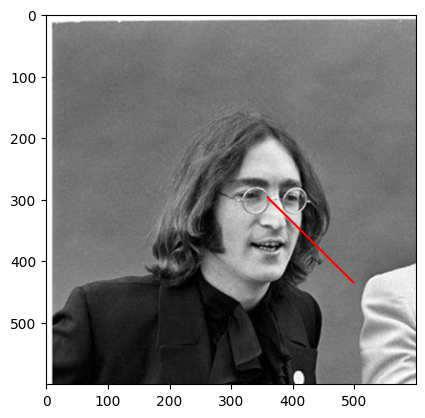

In [ ]:
xt = (m1[0]+m2[0])/2
yt = (m1[1]+m2[1])/2
dx = xr-xc
dy = yr-yc

plt.imshow(I)

plt.plot([xt,xt+dx],[yt,yt+dy],color='red')

plt.show()
